# Deep learning, but not understanding

CAP 6635 Artifical Intelligence Spring 2021
Christian Garbin

In the book "Artifical Intelligence, a giude for thinking humans" (Melanie Mitchell) _____________

TODO

the code is based on the [TensorFlow classification tutorial](https://www.tensorflow.org/tutorials/keras/classification) and the [TensorFlow CNN classification tutorial](https://www.tensorflow.org/tutorials/images/cnn).

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import images

%matplotlib inline

To increase reproducibility (although it's not guaranteed).

In [2]:
# Based on https://stackoverflow.com/a/52897216
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
(train_set, train_label), (test_set, test_label) = images.get_upright_dataset(10)
class_names = images.get_class_labels()

In [4]:
print(train_set.shape, train_set.dtype, train_label.shape, train_label.dtype)
print(test_set.shape, test_set.dtype, test_label.shape, test_label.dtype)

(614, 64, 64) uint8 (614,) uint8
(67, 64, 64) uint8 (67,) uint8


In [5]:
# Normalize the pixel value ranges to improve training
train_set = train_set / 255.0
test_set = test_set / 255.0

In [6]:
train_set = np.reshape(train_set, (-1, 64, 64, 1))
test_set = np.reshape(test_set, (-1, 64, 64, 1))


train_label = np.reshape(train_label, (-1, 1))
test_label = np.reshape(test_label, (-1, 1))

print(train_set.shape, train_set.dtype, train_label.shape, train_label.dtype)
print(test_set.shape, test_set.dtype, test_label.shape, test_label.dtype)

(614, 64, 64, 1) float64 (614, 1) uint8
(67, 64, 64, 1) float64 (67, 1) uint8


In [7]:
print(train_set[0].shape)

(64, 64, 1)


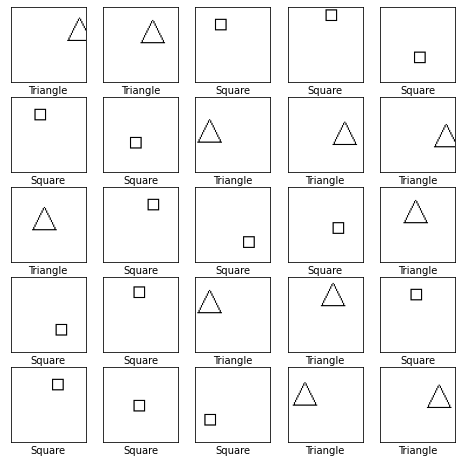

In [22]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap='gray')
    plt.xlabel(class_names[train_label[i][0]])
plt.show()

In [9]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(64, 64)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(2)
# ])
INPUT_SHAPE = (64, 64, 1)
ACTIVATION = 'relu'
NUM_CLASSES=2

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation=ACTIVATION, input_shape=INPUT_SHAPE),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation=ACTIVATION),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=ACTIVATION),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
])


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2, verbose=1,
    restore_best_weights=True)

In [12]:
model.fit(train_set, train_label, batch_size=32, epochs=3, 
          validation_data=(test_set, test_label), callbacks=[callback])

Epoch 1/3
20/20 [==============================] - 3s 154ms/step - loss: 0.8841 - accuracy: 0.5415 - val_loss: 0.6435 - val_accuracy: 0.6119
Epoch 2/3
20/20 [==============================] - 2s 104ms/step - loss: 0.5623 - accuracy: 0.6923 - val_loss: 0.4230 - val_accuracy: 0.8209
Epoch 3/3
20/20 [==============================] - 2s 108ms/step - loss: 0.2694 - accuracy: 0.8976 - val_loss: 0.1300 - val_accuracy: 0.9552


In [13]:
pred_prob = model.predict(test_set)
pred_label = np.argmax(pred_prob, axis=1)

In [14]:
print(pred_label)
print(len(pred_label))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1]
67


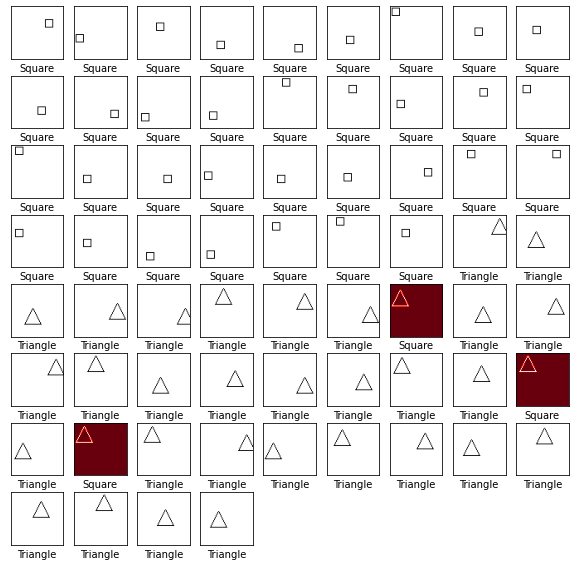

In [15]:
plt.figure(figsize=(10,10))
for i in range(67):
    plt.subplot(8,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    cmap = 'gray' if pred_label[i] == test_label[i][0] else 'Reds'
    plt.imshow(test_set[i], cmap=cmap)
    plt.xlabel(class_names[pred_label[i]])
plt.show()

In [16]:
rotated_squares = images.get_square_rotated_dataset()
rotated_squares = rotated_squares / 255.0
rotated_squares = np.reshape(rotated_squares, (-1, 64, 64, 1))

In [17]:
pred_prob = model.predict(rotated_squares)
pred_label = np.argmax(pred_prob, axis=1)

In [18]:
print(pred_label)
print(len(pred_label))

[1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
88


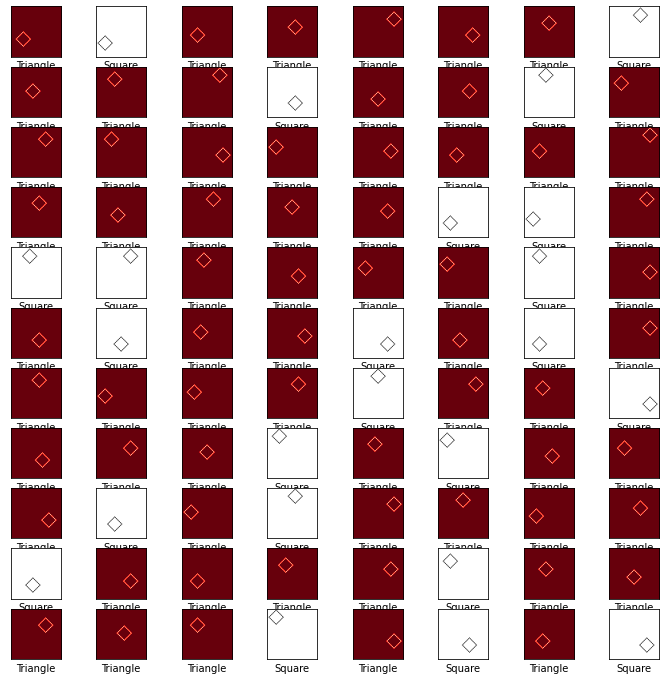

In [19]:
plt.figure(figsize=(12,12))
for i in range(88):
    plt.subplot(11,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    cmap = 'gray' if pred_label[i] == 0 else 'Reds'
    plt.imshow(rotated_squares[i], cmap=cmap)
    plt.xlabel(class_names[pred_label[i]])
plt.show()